Data Extraction

In [67]:
import pandas as pd
import numpy as np

In [68]:
df_customers  = pd.read_csv("Customers.csv")
df_products   = pd.read_csv("Products.csv")
df_transactions = pd.read_csv("Transactions.csv")

In [69]:

print(df_customers.shape)
df_customers.head(5)

(200, 4)


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [70]:
print(df_products.shape)
df_products.head(5)

(100, 4)


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [71]:
print(df_transactions.shape)
df_transactions.head(5)

(1000, 7)


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


Data Cleaning

In [72]:
# checking for missing values:
print(df_customers.isnull().sum())
print(df_products.isnull().sum())
print(df_transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [73]:
print(df_customers.Region.value_counts())

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


In [74]:
print(df_products.Category.value_counts())

Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


In [75]:
# Converting datetime format
df_customers['SignupDate'] = pd.to_datetime(df_customers['SignupDate'])
df_transactions['TransactionDate'] = pd.to_datetime(df_transactions['TransactionDate'])

In [76]:
df_customers.head(5)

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [77]:
# duplicates
print(df_customers.duplicated().sum())
print(df_products.duplicated().sum())
print(df_transactions.duplicated().sum())

0
0
0


In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

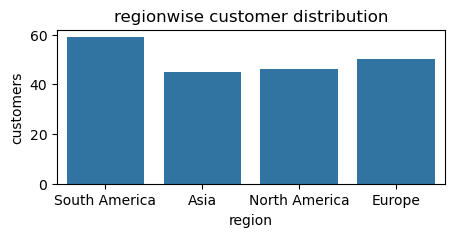

In [79]:
plt.figure(figsize=(5, 2))
sns.countplot(x='Region', data=df_customers)
plt.title("regionwise customer distribution")
plt.xlabel("region")
plt.ylabel("customers")
plt.show()

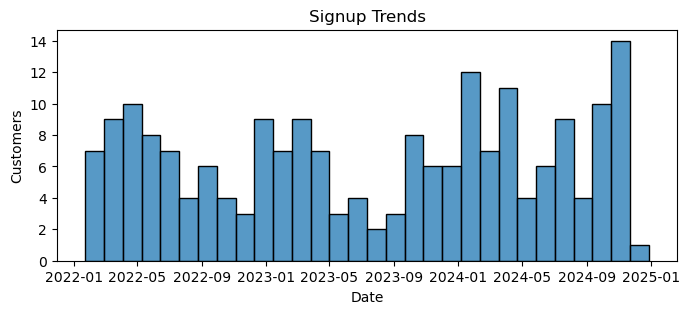

In [80]:
plt.figure(figsize=(8, 3))
sns.histplot(df_customers['SignupDate'], bins=30)
plt.title("Signup Trends")
plt.xlabel("Date")
plt.ylabel("Customers")
plt.show()

In [81]:
top_products = df_transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products

ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
P057    43
P048    43
P062    39
P020    38
P028    38
Name: Quantity, dtype: int64

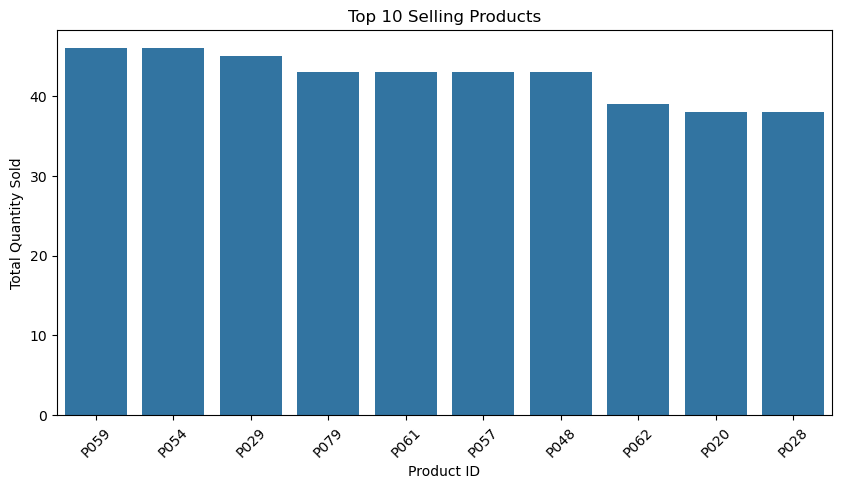

In [82]:
top_products = df_transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title("Top 10 Selling Products")
plt.xlabel("Product ID")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.show()

In [83]:
customer_purchase_freq = df_transactions.groupby('CustomerID')['TransactionID'].count()
customer_purchase_freq

CustomerID
C0001    5
C0002    4
C0003    4
C0004    8
C0005    3
        ..
C0196    4
C0197    3
C0198    2
C0199    4
C0200    5
Name: TransactionID, Length: 199, dtype: int64

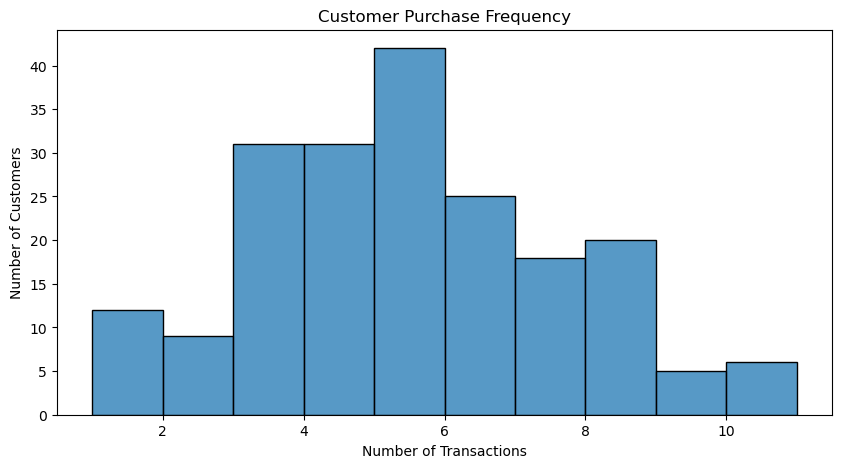

In [84]:
customer_purchase_freq = df_transactions.groupby('CustomerID')['TransactionID'].count()
plt.figure(figsize=(10, 5))
sns.histplot(customer_purchase_freq)
plt.title("Customer Purchase Frequency")
plt.xlabel("Number of Transactions")
plt.ylabel("Number of Customers")
plt.show()

In [85]:
# 1. Merge Transactions with Customers
#    Join on CustomerID to get customer details in the transactions
merged_df1 = pd.merge(df_transactions, df_customers, on='CustomerID', how='left')

# 2. Merge the result with Products
#    Join on ProductID to get product details
merged_df = pd.merge(merged_df1, df_products, on='ProductID', how='left')

# Now, merged_df contains all the information from the three DataFrames:
merged_df.head(5)



,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [86]:
print(merged_df['TransactionDate'].min())
print(merged_df['TransactionDate'].max())

2023-12-30 15:29:12
2024-12-28 11:00:00


In [87]:
print(df_products.shape)
print(df_customers.shape)
print(df_transactions.shape)
print(merged_df.shape)

(100, 4)
(200, 4)
(1000, 7)
(1000, 13)


In [88]:
print(merged_df.isnull().sum())


TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64


In [89]:
# Example of analysis: Total revenue per customer
customer_revenue = merged_df.groupby('CustomerID')['TotalValue'].sum()
print(customer_revenue.sort_values(ascending=False)) 

# Example of analysis: Top selling product categories
category_sales = merged_df.groupby('Category')['TotalValue'].sum()
print(category_sales) 

CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
           ...   
C0014      318.66
C0151      223.96
C0097      137.54
C0033      132.64
C0060       82.36
Name: TotalValue, Length: 199, dtype: float64
Category
Books          192147.47
Clothing       166170.66
Electronics    180783.50
Home Decor     150893.93
Name: TotalValue, dtype: float64


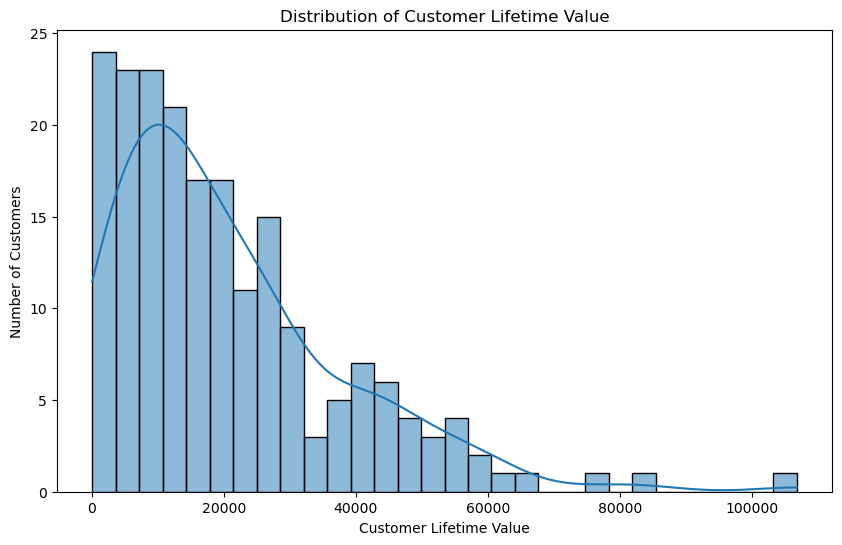

In [90]:
# Calculate customer revenue
customer_revenue = merged_df.groupby('CustomerID')['TotalValue'].sum()

# Calculate average purchase frequency (simplified)
customer_frequency = merged_df.groupby('CustomerID')['TransactionID'].nunique()

# Calculate CLTV (simplified)
cltv = customer_revenue * customer_frequency

# Segment customers based on CLTV
cltv_segments = pd.qcut(cltv, q=3, labels=['Low-Value', 'Mid-Value', 'High-Value'])
merged_df['CLTV_Segment'] = cltv_segments

# Visualize CLTV distribution
plt.figure(figsize=(10, 6))
sns.histplot(cltv, bins=30, kde=True)
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Lifetime Value')
plt.show()

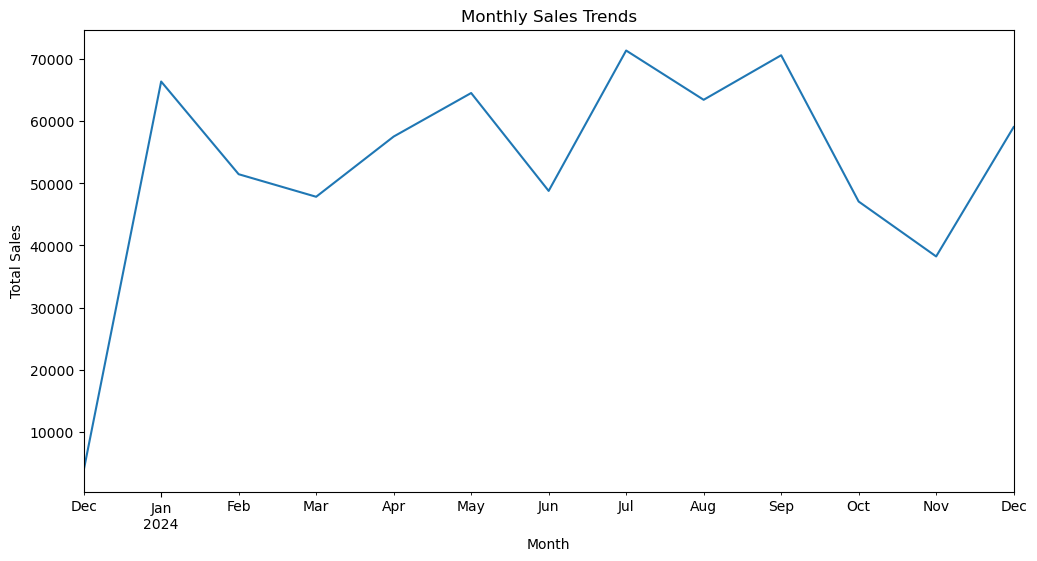

In [91]:
monthly_sales = merged_df.groupby(merged_df['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()

# Plot monthly sales trends
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trends')
plt.show()

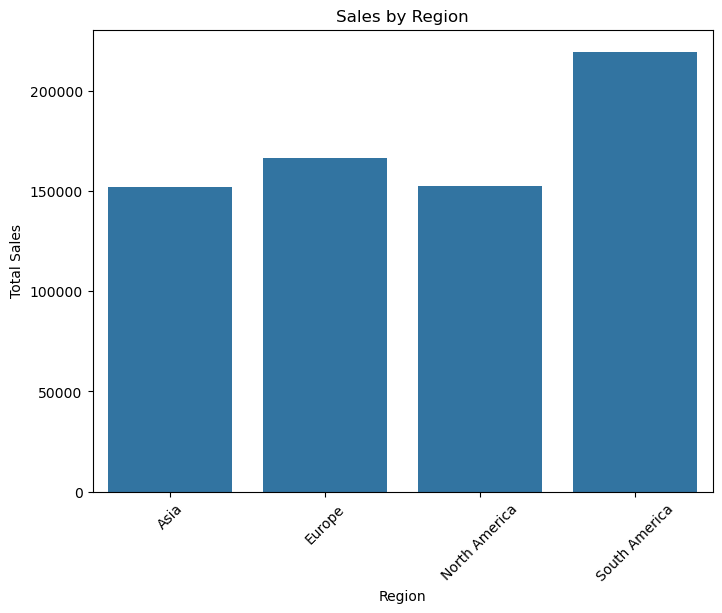

In [92]:
regional_sales = merged_df.groupby('Region')['TotalValue'].sum()

# Plot regional sales
plt.figure(figsize=(8, 6))
sns.barplot(x=regional_sales.index, y=regional_sales.values)
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Sales by Region')
plt.xticks(rotation=45)
plt.show()

In [93]:


# Calculate total sales and units sold for each product
product_sales = merged_df.groupby('ProductID')['TotalValue'].sum()
product_units_sold = merged_df.groupby('ProductID')['Quantity'].sum()

# Calculate average unit price for each product
product_avg_price = merged_df.groupby('ProductID')['Price'].mean()

# Create a DataFrame for product-wise breakdown
product_summary = pd.DataFrame({
    'Total Sales': product_sales,
    'Units Sold': product_units_sold,
    'Average Price': product_avg_price
})

# Sort products by total sales (descending)
product_summary = product_summary.sort_values(by='Total Sales', ascending=False)

# Visualize top-selling products
top_n = 10  # Number of top products to visualize
plt.figure(figsize=(12, 6))
sns.barplot(x=product_summary.index[:top_n], y=product_summary['Total Sales'][:top_n])
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.title('Top Selling Products')
plt.xticks(rotation=45)
plt.show()

# Visualize product sales distribution
plt.figure(figsize=(10, 6))
sns.histplot(product_sales, bins=30, kde=True)
plt.xlabel('Total Sales')
plt.ylabel('Number of Products')
plt.title('Distribution of Product Sales')
plt.show()

# Analyze product performance by category (if available)
if 'Category' in merged_df.columns:
    category_sales = merged_df.groupby('Category')['TotalValue'].sum()
    plt.figure(figsize=(8, 6))
    sns.barplot(x=category_sales.index, y=category_sales.values)
    plt.xlabel('Category')
    plt.ylabel('Total Sales')
    plt.title('Sales by Category')
    plt.xticks(rotation=45)
    plt.show()

# Further analysis:
# - Analyze sales trends for individual products over time
# - Identify slow-moving and fast-moving products
# - Investigate potential price adjustments based on product performance

KeyError: 'Column not found: Price'